# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# Data Cleaning and Analysis

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 9.xlsx')

In [3]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [4]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)
print(raw_data)

          Emg1    Emg2    Emg3    Emg4    Emg5    Emg6    Emg7    Emg8  \
0       0.0049  0.0024  0.0024  0.0024  0.0024  0.0024  0.0977  0.0439   
1       0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.1001  0.0439   
2       0.0049  0.0024  0.0024  0.0024  0.0049  0.0024  0.0952  0.0415   
3       0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0879  0.0366   
4       0.0049  0.0024  0.0049  0.0024  0.0049  0.0024  0.0879  0.0342   
...        ...     ...     ...     ...     ...     ...     ...     ...   
461350  0.0024  0.0024  0.0024  0.0024  0.0024  0.0342  0.0854  0.1489   
461351  0.0024  0.0024  0.0024  0.0024  0.0024  0.0464  0.0757  0.1270   
461352  0.0024  0.0024  0.0024  0.0024  0.0024  0.0537  0.0635  0.1123   
461353  0.0024  0.0024  0.0024  0.0024  0.0024  0.0586  0.0562  0.1050   
461354  0.0024  0.0024  0.0024  0.0024  0.0024  0.0635  0.0464  0.0928   

          Emg9   Emg10  repetition  rerepetition  stimulus  restimulus  
0       0.0024  0.0781           0    

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377804 entries, 0 to 461354
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          377804 non-null  float64
 1   Emg2          377804 non-null  float64
 2   Emg3          377804 non-null  float64
 3   Emg4          377804 non-null  float64
 4   Emg5          377804 non-null  float64
 5   Emg6          377804 non-null  float64
 6   Emg7          377804 non-null  float64
 7   Emg8          377804 non-null  float64
 8   Emg9          377804 non-null  float64
 9   Emg10         377804 non-null  float64
 10  repetition    377804 non-null  int64  
 11  rerepetition  377804 non-null  int64  
 12  stimulus      377804 non-null  int64  
 13  restimulus    377804 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 43.2 MB


# Data Splitting

In [6]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

In [7]:
colnames = X.columns

In [8]:
from sklearn.preprocessing import MinMaxScaler
# Define dictionary to store our rankings
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

# Feature Selection

# Filter Method

# ANOVA f-test Feature Selection

In [9]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [10]:
# configure to select all features
fs = SelectKBest(score_func=f_classif, k='all')
fs.fit(X, y)

SelectKBest(k='all')

In [11]:
ranks["ANOVA"] = ranking(np.abs(fs.scores_), colnames)
print('finished')

finished


# Embedded Method Feature Selection

# Random Forest Feature Importance

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
model_rf = RandomForestClassifier(bootstrap = True,
              ccp_alpha = 0.0,
              class_weight =  None,
              criterion = 'entropy',
              max_depth = None,
              max_features = 'auto' ,
              max_leaf_nodes = None,
              max_samples = None,
              min_impurity_decrease = 0.0,
              min_samples_leaf = 1,
              min_samples_split = 2,
              min_weight_fraction_leaf = 0.0,
              n_estimators = 500,
              n_jobs = None,
              oob_score = False,
              random_state = None,
              verbose = 0,
              warm_start = False)
model_rf.fit(X, y)

RandomForestClassifier(criterion='entropy', n_estimators=500)

In [14]:
ranks["RF"] = ranking(np.abs(model_rf.feature_importances_), colnames)
print('finished')

finished


# Result : Creating the Feature Ranking Matrix

In [15]:
# Create empty dictionary to store the mean value calculated from all the scores
r = {}
for name in colnames:
    r[name] = round(np.mean([ranks[method][name] 
                             for method in ranks.keys()]), 2)
 
methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")

print("\t%s" % "\t".join(methods))
for name in colnames:
    print("%s\t%s" % (name, "\t".join(map(str, 
                         [ranks[method][name] for method in methods]))))

	ANOVA	RF	Mean
Emg1	0.0	0.35	0.18
Emg2	0.38	0.29	0.34
Emg3	0.61	0.62	0.62
Emg4	0.65	0.31	0.48
Emg5	0.19	0.0	0.1
Emg6	0.35	0.6	0.48
Emg7	0.86	1.0	0.93
Emg8	1.0	0.9	0.95
Emg9	0.51	0.49	0.5
Emg10	0.43	0.71	0.57


# Visualization

In [16]:
# Put the mean scores into a Pandas dataframe
meanplot = pd.DataFrame(list(r.items()), columns= ['Feature','Mean Ranking'])

# Sort the dataframe
meanplot = meanplot.sort_values('Mean Ranking', ascending=False)

E:\MachineLearning\envs\gpu\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
E:\MachineLearning\envs\gpu\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


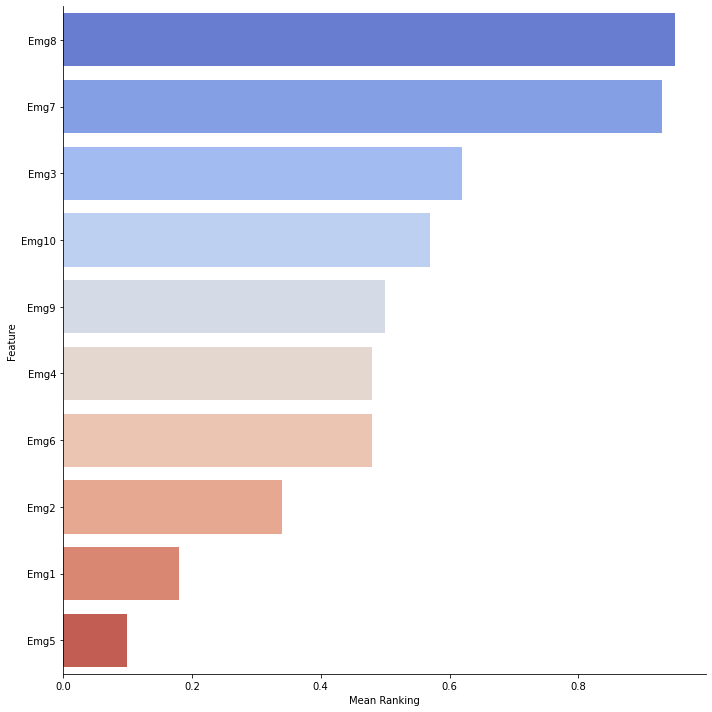

In [17]:
# Let's plot the ranking of the features
sns.factorplot(x="Mean Ranking", y="Feature", data = meanplot, kind="bar", size=10, aspect=1, palette='coolwarm')